In [ ]:
__Name__ = "Yash Patel"

__Email__ = "yashpatel@miami.edu"

This program is to simply analyze a stock's price data and derive a Hurst exponent. This can be used to determine the type of market behavior that it has been recorded to show. A lower exponent, particularly below 0.5, shows a tendency of a time series to revert to its mean, howeer a higher one, particularly above 0.5, the stock's market shows trend-following tendencies, indicating a greater potential of success for momentum strategies. 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'S&P 500'}, xlabel='Date'>

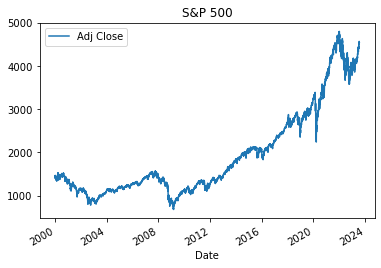

In [2]:
df = yf.download('^GSPC', start = '2000-01-01')[['Adj Close']]
df.plot(title = "S&P 500")

In [3]:
# Though the different periods can be observed visually, to get precise measurements the Hurst exponent can help
# There are a few ways to calculate the Hurst exponenet; one is to estimate the rate of diffusion, based on the variance of 
# prices (logged) over different time gaps(lags), testing autocorrelation (correlation beteween the original and lagged time series)

In [4]:
# we first calculate the standard deviation of the differences between a series 
# and its lagged version, for a range of possible lags. We then estimatethe Hurst exponent 
# as the slope of the log-log plot of the number of lags versus the mentioned standard 
# deviations.

In [5]:
def get_hurst_exp(ts, max_lag=20):
    lags = range(2,max_lag)
    tau = [np.std(np.subtract(ts[lag:],
ts[:-lag])) for lag in lags]
    
    return np.polyfit(np.log(lags),
np.log(tau), 1)[0]
# polyfit fits the data in a polynomial function, and calculates its slope. The data passed into polyfit is the x var, y var, and the degree
# np.log(lags) is the x var, or indepedent var, as it is what the diffusion is parameterized by, and the y var,
#  or dependent var, is np.log(tau), which is the variances of the lagged differences

In [6]:
# printing the Hurst exponent at different lags...Over the entire time series, the S&P is close to random, however 
# in shorter lags, however, there is evidence of mean reversion. 

for lag in [20,100,250,500,1000]:
    hurst_exp=get_hurst_exp(df.values,lag)
    print(f"{lag} lags:{hurst_exp:.4f}")

20 lags:0.4757
100 lags:0.4328
250 lags:0.4759
500 lags:0.4875
1000 lags:0.4616


In [7]:
# as you can see, the Hurst exponent for the S&P is nearly 0.5, with a slight trend towards mean reversion, greater 
# shown in shorter lags

In [8]:
# When using a shorter time period, in this case the Financial Crisis in the mid 2000s, it will show the Hurst exponent
# was much more mean-reverting, especially with more lags

In [9]:
shorter_series = df.loc["2005":"2007"].values
for lag in[20,100,250,500]:
    hurst_exp = get_hurst_exp(shorter_series, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

20 lags: 0.3989
100 lags: 0.3215
250 lags: 0.2507
500 lags: 0.1258
